In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

/tmp/ipykernel_12652/950747112.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# central limit theorom and law of large number

In [3]:
np.random.seed(42)
n_samples = 1000
sample_size = 30

In [4]:
# generate data
data = np.random.randint(1, 10, (n_samples, sample_size))
#calc sample means
sample_means = np.mean(data, axis=1)

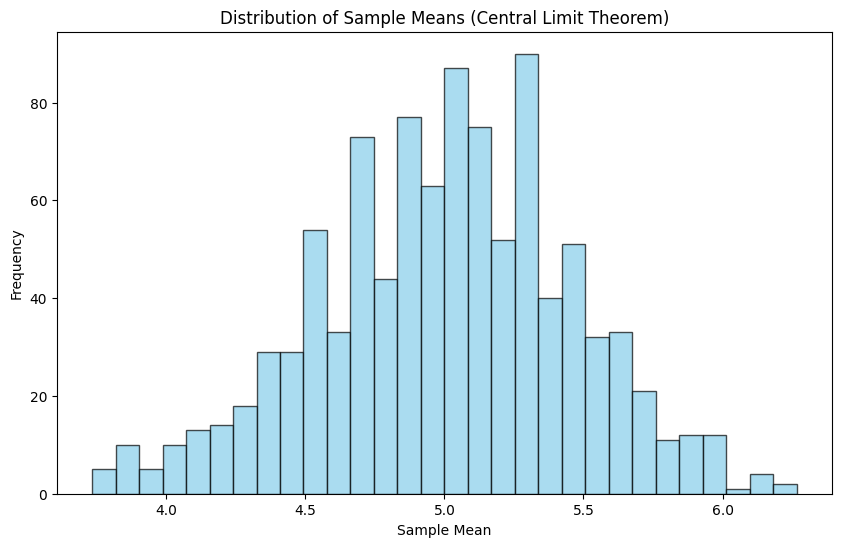

In [5]:
# plot distribution of sample mean
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Sample Means (Central Limit Theorem)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

In [6]:
# find cum means
n_values = np.arange(1, n_samples + 1)
cumulative_means = np.cumsum(sample_means) / n_values

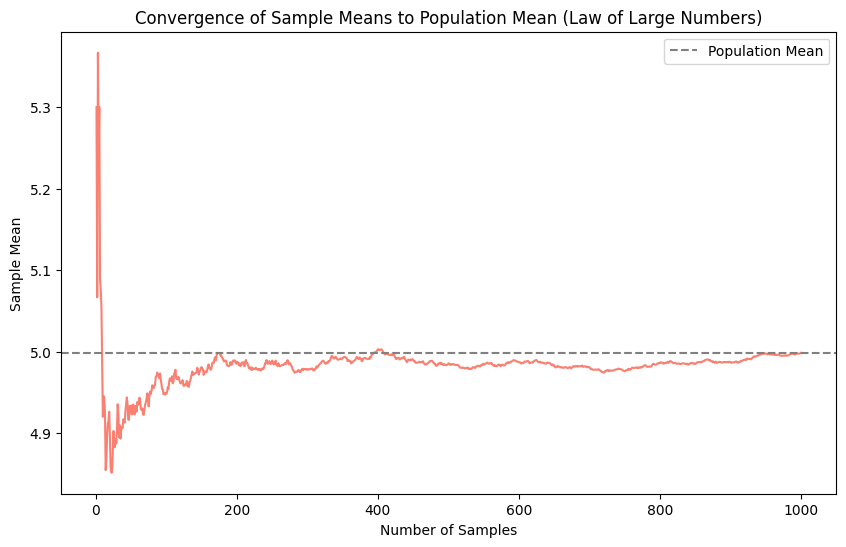

In [7]:
# line plot to show sample mean converge to population
plt.figure(figsize=(10, 6))
plt.plot(n_values, cumulative_means, color='salmon')
plt.axhline(y=np.mean(data), color='gray', linestyle='--', label='Population Mean')
plt.title('Convergence of Sample Means to Population Mean (Law of Large Numbers)')
plt.xlabel('Number of Samples')
plt.ylabel('Sample Mean')
plt.legend()
plt.show()

# as 2

In [45]:
# Load the dataset
movies_df = pd.read_csv('movies.csv')

# Selecting a column to analyze, for example 'Gross'
column_to_analyze = 'Gross'

In [46]:
movies_df.shape

(100, 62)

In [47]:
movies_df.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47000000,100546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA


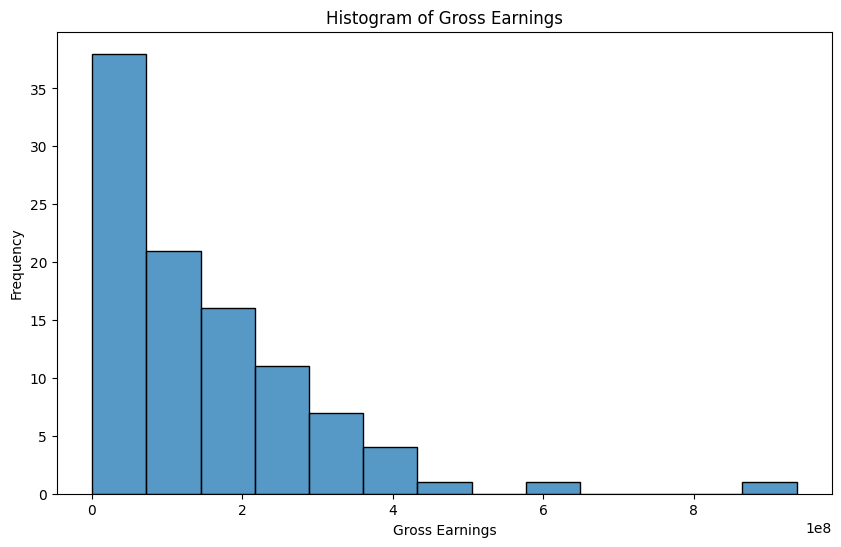

In [16]:
# Creating a histogram for the 'Gross' column
plt.figure(figsize=(10, 6))
sns.histplot(movies_df[column_to_analyze])
plt.title('Histogram of Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Frequency')
plt.show()

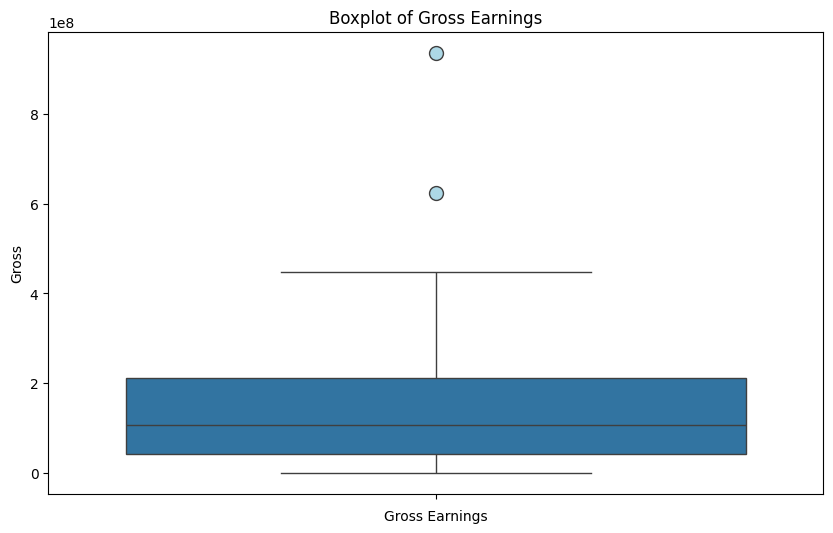

In [29]:
# Creating a boxplot for the 'Gross' column
plt.figure(figsize=(10, 6))
sns.boxplot(y=movies_df[column_to_analyze],
            flierprops=dict(marker='o', markerfacecolor='lightblue', markersize=10))
# can use whis=1 whisker value  to aboe plot as whist=kers len is 1.5x of IQR by default
plt.title('Boxplot of Gross Earnings')
plt.xlabel('Gross Earnings')
plt.show()

In [35]:
# Identifying outliers using IQR
Q1 = movies_df[column_to_analyze].quantile(0.25)
Q3 = movies_df[column_to_analyze].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out the outliers
movies_df_filtered = movies_df[(movies_df[column_to_analyze] >= lower_bound) & (movies_df[column_to_analyze] <= upper_bound)]
print(len(movies_df_filtered[column_to_analyze]))

98


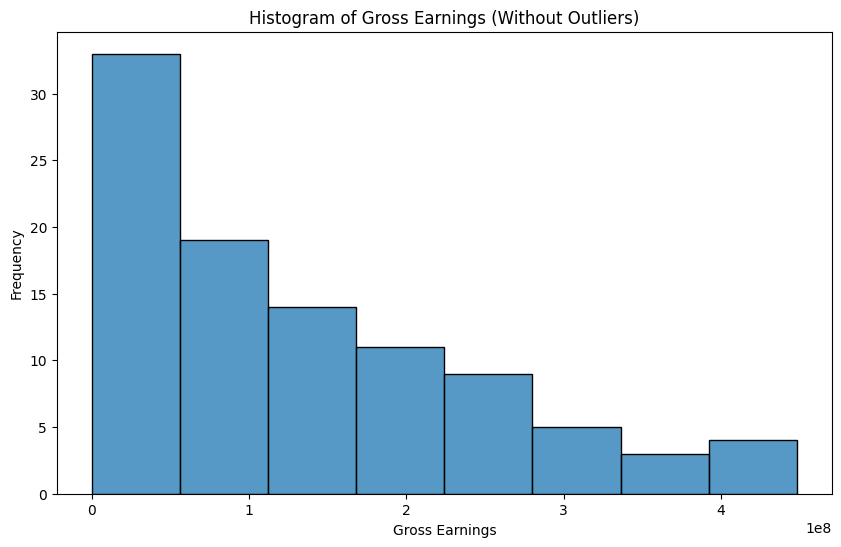

In [17]:
# Creating a histogram without outliers
plt.figure(figsize=(10, 6))
sns.histplot(movies_df_filtered[column_to_analyze])
plt.title('Histogram of Gross Earnings (Without Outliers)')
plt.xlabel('Gross Earnings')
plt.ylabel('Frequency')
plt.show()

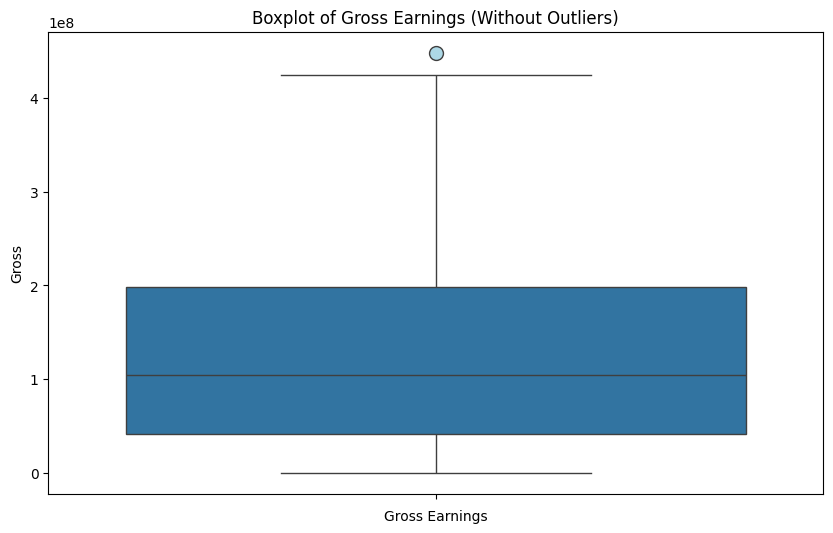

In [13]:
# Creating a boxplot without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=movies_df_filtered[column_to_analyze],
            flierprops=dict(marker='o', markerfacecolor='lightblue', markersize=10))
plt.title('Boxplot of Gross Earnings (Without Outliers)')
plt.xlabel('Gross Earnings')
plt.show()